In [1]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime, timedelta

# File to Load (Remember to Change These)
path1 = "input/credit_record.csv"
path2 = "input/application_record.csv"

# Read Purchasing File and store into Pandas data frame
credit_df = pd.read_csv(path1)
application_df = pd.read_csv(path2)

application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [2]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3]:
credit_df['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [4]:
credit_df['STATUS'] = credit_df['STATUS'].replace(['X', 'C'], 0)

credit_df['STATUS'] = credit_df['STATUS'].astype(int)

In [5]:
credit_df['STATUS'].unique()

array([0, 1, 2, 3, 4, 5])

In [6]:
credit_df = credit_df.sort_values(by='STATUS', ascending=False)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
418975,5050603,-29,5
832451,5117313,-32,5
832449,5117313,-30,5
832448,5117313,-29,5
832447,5117313,-28,5


In [7]:
credit_df = credit_df.drop_duplicates(subset='ID', keep="first")
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
418975,5050603,-29,5
832451,5117313,-32,5
979818,5142362,-1,5
947078,5135636,-6,5
810410,5116036,-12,5


In [8]:
len_credit = len(credit_df.index)
len_application = len(application_df.index)

print(len_credit)
print(len_application)

unique_credit = credit_df['ID'].nunique()
unique_application = application_df['ID'].nunique()

print(unique_credit)
print(unique_application)

45985
438557
45985
438510


In [9]:
credit_card_df = pd.merge(application_df, credit_df, on='ID', how='outer')
credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-13.0,1.0
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-12.0,1.0
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0.0,0.0
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,-4.0,0.0
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,-24.0,0.0


In [10]:
credit_card_df['STATUS'].unique()

array([ 1.,  0., nan,  5.,  2.,  3.,  4.])

In [11]:
credit_card_df = credit_card_df[credit_card_df['STATUS'].notna()]

credit_card_df['STATUS'].unique()

len_credit_card = len(credit_card_df.index)

print(len_credit_card)

unique_credit_card = credit_card_df['ID'].nunique()

print(unique_credit_card)

45985
45985


In [12]:
credit_card_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE         float64
STATUS                 float64
dtype: object

In [13]:
credit_card_df = credit_card_df[credit_card_df['CNT_CHILDREN'].notna()]
credit_card_df = credit_card_df[credit_card_df['CNT_CHILDREN'].notna()]
credit_card_df['CNT_CHILDREN'] = credit_card_df['CNT_CHILDREN'].astype(int)
credit_card_df['AMT_INCOME_TOTAL'] = credit_card_df['AMT_INCOME_TOTAL'].astype(int)
credit_card_df['FLAG_MOBIL'] = credit_card_df['FLAG_MOBIL'].astype(int)
credit_card_df['FLAG_WORK_PHONE'] = credit_card_df['FLAG_WORK_PHONE'].astype(int)
credit_card_df['FLAG_PHONE'] = credit_card_df['FLAG_PHONE'].astype(int)
credit_card_df['FLAG_EMAIL'] = credit_card_df['FLAG_EMAIL'].astype(int)
credit_card_df['CNT_FAM_MEMBERS'] = credit_card_df['CNT_FAM_MEMBERS'].astype(int)
credit_card_df['STATUS'] = credit_card_df['STATUS'].astype(int)
credit_card_df['DAYS_BIRTH'] = credit_card_df['DAYS_BIRTH'].astype(int)
credit_card_df['DAYS_EMPLOYED'] = credit_card_df['DAYS_EMPLOYED'].astype(int)

credit_card_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int32
AMT_INCOME_TOTAL         int32
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int32
DAYS_EMPLOYED            int32
FLAG_MOBIL               int32
FLAG_WORK_PHONE          int32
FLAG_PHONE               int32
FLAG_EMAIL               int32
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int32
MONTHS_BALANCE         float64
STATUS                   int32
dtype: object

In [14]:
credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-13.0,1
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-12.0,1
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0.0,0
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4.0,0
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-24.0,0


In [15]:
credit_card_df['DAYS_BIRTH'] = abs(credit_card_df['DAYS_BIRTH'])
credit_card_df['DAYS_EMPLOYED'] = abs(credit_card_df['DAYS_EMPLOYED'])

credit_card_df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,-13.0,1
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,-12.0,1
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2,0.0,0
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,-4.0,0
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,-24.0,0


In [16]:
unique_gender = credit_card_df['CODE_GENDER'].unique()
print(unique_gender)

unique_flag_car = credit_card_df['FLAG_OWN_CAR'].unique()
print(unique_flag_car)

unique_flag_reality = credit_card_df['FLAG_OWN_REALTY'].unique()
print(unique_flag_reality)

unique_children = credit_card_df['CNT_CHILDREN'].unique()
print(unique_children)

unique_income_type = credit_card_df['NAME_INCOME_TYPE'].unique()
print(unique_income_type)

unique_education = credit_card_df['NAME_EDUCATION_TYPE'].unique()
print(unique_education)

unique_family_status = credit_card_df['NAME_FAMILY_STATUS'].unique()
print(unique_family_status)

unique_housing = credit_card_df['NAME_HOUSING_TYPE'].unique()
print(unique_housing)

unique_occupation = credit_card_df['OCCUPATION_TYPE'].unique()
print(unique_occupation)

unique_status = credit_card_df['STATUS'].unique()
print(unique_status)

['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
[1 0 5 2 3 4]


In [17]:
income_total = credit_card_df['AMT_INCOME_TOTAL'] / 1000   
    
# Determine outliers using upper and lower bounds
quartiles = income_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"IQR is {iqr}")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

IQR is 103.5
Values below -33.75 could be outliers
Values above 380.25 could be outliers


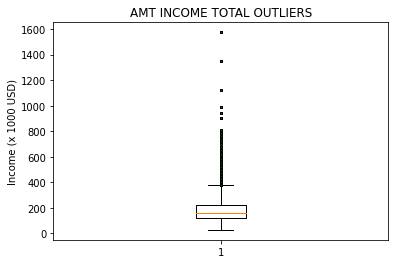

In [18]:
import matplotlib.pyplot as plt
flierprops = dict(marker='o', markerfacecolor='green', markersize=2, linestyle='none')

fig, ax = plt.subplots()
ax.set_title("AMT INCOME TOTAL OUTLIERS")
ax.set_ylabel("Income (x 1000 USD)")
ax.boxplot(income_total, flierprops=flierprops)
plt.show()

<AxesSubplot:>

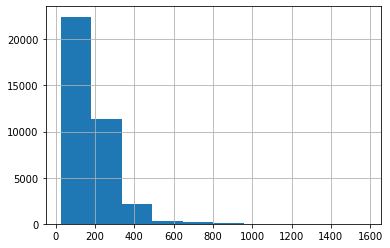

In [19]:
income_total.hist(bins=10)

In [20]:
minincome = income_total.min()
maxincome = income_total.max()

print(minincome)
print(maxincome)

27.0
1575.0


In [21]:
credit_card_df = credit_card_df.drop(['MONTHS_BALANCE'], axis=1)

credit_card_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,1
1,5008805,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2,1
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,0
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,0


In [22]:
credit_card_df.to_csv ('cc_dataset.csv', index = False, header=True)

In [23]:
count = credit_card_df["OCCUPATION_TYPE"].isna().sum()

print(count)

11323


In [24]:
cc_outliers_df = credit_card_df[credit_card_df['AMT_INCOME_TOTAL'] < 380250] 

cc_outliers_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
2,5008806,M,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,0
4,5008809,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,0
5,5008810,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,0
6,5008811,F,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1,0


In [25]:
len_cc_outliers = len(cc_outliers_df.index)

print(len_cc_outliers)

34928


<AxesSubplot:>

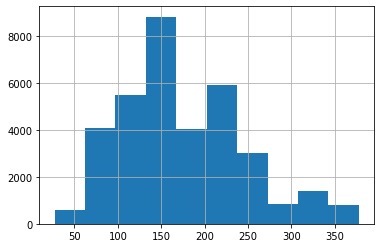

In [26]:
income_total_outliers = cc_outliers_df['AMT_INCOME_TOTAL'] / 1000   

income_total_outliers.hist(bins=10)

In [27]:
cc_outliers_df.to_csv ('cc_outliers_dataset.csv', index = False, header=True)